In [ ]:
!mkdir -p ~/.kaggle
!kaggle.json ~/.kaggle

/bin/bash: line 1: kaggle.json: command not found


In [ ]:
!kaggle datasets download -d stefancomanita/cats-and-dogs-40

Dataset URL: https://www.kaggle.com/datasets/stefancomanita/cats-and-dogs-40
License(s): CC0-1.0
cats-and-dogs-40.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/cats-and-dogs-40.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np

Categories = ['cat', 'dog']
flat_data_arr = []  # input array
target_arr = []  # output array

# Specify the main directory containing both training and testing subdirectories
main_datadir = 'catsAndDogs40/'

# Iterate through both training and testing categories
for category in Categories:
    print(f'loading... category: {category}')

    # Specify the subdirectories for training and testing
    train_or_test_dirs = ['train', 'test']

    for train_or_test in train_or_test_dirs:
        # Form the complete path
        path = os.path.join(main_datadir, train_or_test, category)

        for img in os.listdir(path):
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (40, 40, 3))  # Adjust the size as needed
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(category))

        print(f'loaded {train_or_test} category: {category} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

loading... category: cat
loaded train category: cat successfully
loaded test category: cat successfully
loading... category: dog
loaded train category: dog successfully
loaded test category: dog successfully


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(80, 4801)

In [ ]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

In [ ]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
											random_state=77,
											stratify=y)

In [ ]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
			'gamma':[0.0001,0.001,0.1,1],
			'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

In [ ]:
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [ ]:
# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 68.75% accurate


In [ ]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.71      0.62      0.67         8
         dog       0.67      0.75      0.71         8

    accuracy                           0.69        16
   macro avg       0.69      0.69      0.69        16
weighted avg       0.69      0.69      0.69        16



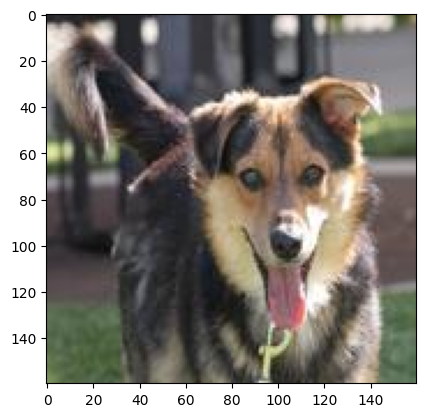

The predicted image is : dog


In [ ]:
path='catsAndDogs40/test/dog/2.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(40,40,3))
l=[img_resize.flatten()]
print("The predicted image is : "+Categories[model.predict(l)[0]])

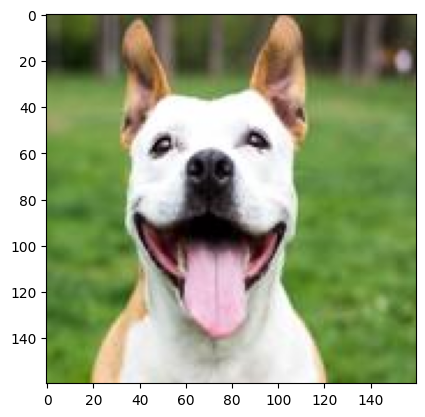

The predicted image is : dog


In [ ]:
path='catsAndDogs40/test/dog/5.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(40,40,3))
l=[img_resize.flatten()]
print("The predicted image is : "+Categories[model.predict(l)[0]])